In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('archive\covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df2 = df[df['State/UnionTerritory'] == 'Dadra and Nagar Haveli and Daman and Diu']          #

Questions

1) Find the state with maximum covid cases(WITHOUT ADDING 'Dadra and Nagar Haveli and Daman and Diu' ) 

In [4]:
df.isnull().sum()               #Checking for null values none found 

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [6]:
df.shape

(18110, 9)

In [7]:
df = df[df['State/UnionTerritory'] != 'Cases being reassigned to states']
df.head()                              # As the number of cases being reassigned to states have a very low value in comparision to the data avialable im dropping them off .

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [8]:
def state(df):
    if '*' in df :
        df = df.replace('*',' ')
        
    if df !='Cases being reassigned to states' or df!=  'unassigned':
        return df.strip()

df['State/UnionTerritory'] = df['State/UnionTerritory'].apply(state)
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [9]:
df.dropna(inplace = True)

In [10]:
df.shape

(18050, 9)

In [11]:
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim',
       'Daman & Diu', 'Lakshadweep', 'Telangana',
       'Dadra and Nagar Haveli', 'Himanchal Pradesh', 'Karanataka'],
      dtype=object)

In [12]:
dct = {}
for key,dataf in df.groupby('State/UnionTerritory'):        #Calculated the number of covid cases in each state and added it to a dic
    dct[key] = dataf.Confirmed.sum()c

In [13]:
df1 = pd.DataFrame(dct.values(),dct.keys())
df1 = df1.rename(columns = {0:'Confirmed_cases'})
df1=df1.sort_values(by = 'Confirmed_cases')
df4 = df1.head()

In [14]:
df4['State']=  df4.index

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


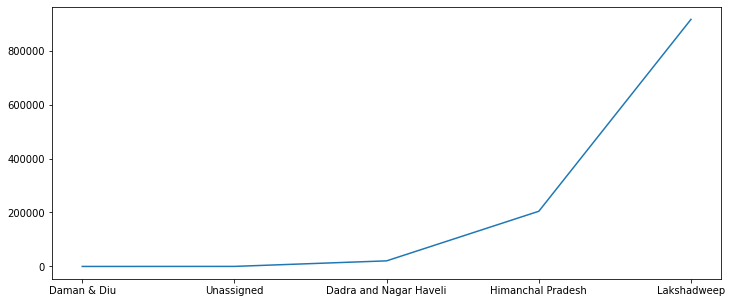

In [15]:
plt.figure(figsize  = (12,5))
plt.plot(df4.State,df4.Confirmed_cases)
plt.show()

2) 1) Find the state with maximum covid cases(WITH ADDING 'Dadra and Nagar Haveli and Daman and Diu' ) 

In [16]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [17]:
lst  = ['Dadra','Nagar Haveli','Daman and Diu']
for state in lst:
    if df['Confirmed'][df['State/UnionTerritory'] == 'Dadra and Nagar Haveli and Daman and Diu'].all() > 3:
        df['Confirmed'][df['State/UnionTerritory'] == state] += df['Confirmed'][df['State/UnionTerritory'] == 'Dadra and Nagar Haveli and Daman and Diu']//3//len(df['Confirmed'][df['State/UnionTerritory'] == state] )

In [18]:
dct = {}
for key,dataf in df.groupby('State/UnionTerritory'):        #Calculated the number of covid cases in each state and added it to a dic
    dct[key] = dataf.Confirmed.sum()
    

In [19]:
df1 = pd.DataFrame(dct.values(),dct.keys())
df1 = df1.rename(columns = {0:'Confirmed_cases'})
df1=df1.sort_values(by = 'Confirmed_cases')
df4 = df1.head()

In [20]:
df4['State']=  df4.index

D:\Users\Ridham Suhagiya\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


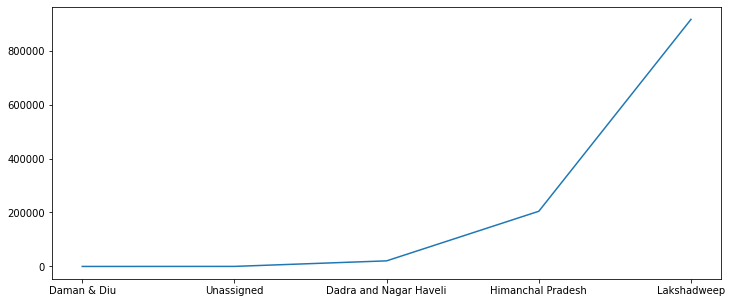

In [21]:
plt.figure(figsize  = (12,5))
plt.plot(df4.State,df4.Confirmed_cases)
plt.show()